<a href="https://colab.research.google.com/github/Wayne122/CMPE257/blob/main/Homework4-Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 -- Decision Tree

Author: Han-Wei Lin

Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Dataset in-drive ID: 1_2mf4NXzVFyxuZ1QXPHpBNnHcPeGj-H5

Data:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.

##Import library and data

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1_2mf4NXzVFyxuZ1QXPHpBNnHcPeGj-H5"})
downloaded.GetContentFile('dataset.csv')

data = pd.read_csv('dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Applying decision tree classifier

### Split input and output

In [ ]:
i_train = data.drop('target', axis=1)
o_train = data['target']

### Create model and train

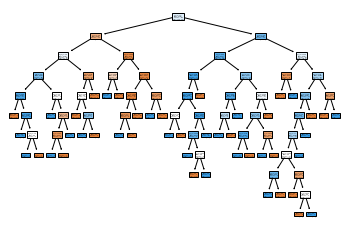

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier()
clf.fit(i_train, o_train)
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree.pdf',format='pdf')

### Check the result

In [ ]:
pred = clf.predict(i_train)
metrics.accuracy_score(o_train, pred)

1.0

## Conclusion

What I did is used all the data we have to predict if the record owner has heart disease. According to the data provider, there were more columns than now, the columns we have now are all risk factors.

We can see that using decision tree model achieved 100% accuracy. So this means the data is actually clustered in some way. And becasue we cannot achieve such accuracy using logistic regression, the data is very likely not able to be divided using linear line.

## References

https://mathtuition88.com/2019/10/11/how-to-save-sklearn-tree-plot-as-file-vector-graphics/